# Report: Tencent AI Lab HoK Environment (hok_env)




## Table of Contents
- [1. Project Overview](#bullet1)
- [2. Why This Project Is Interesting](#bullet2)
  - [2.1 Key Components](#bullet2_1)
- [3. Data + Plot from the Repo](#bullet3)
- [4. Quick Summary Table](#bullet4)
- [5. Takeaways](#bullet5)

## 1. Project Overview <a class="anchor" id="bullet1"></a>

The GitHub project I’m describing is **Tencent AI Lab’s** *Honor of Kings* reinforcement-learning environment:

- Project link: https://github.com/tencent-ailab/hok_env

This repo provides an SDK and training framework for building agents in a MOBA-style environment.  
What makes it stand out is that it targets **competitive multi-agent RL** and emphasizes *generalization* challenges (different heroes/opponents/tasks).


## 2. Why This Project Is Interesting <a class="anchor" id="bullet2"></a>

In plain words: it’s a serious research-grade environment built around a real, complex game.

### 2.1 Key Components <a class="anchor" id="bullet2_1"></a>

- **Environment SDK** to interact with the gamecore
- **RL training framework** included in the repo
- A baseline **PPO** implementation (useful if you want to study/extend it)
- Support for different modes (e.g., 1v1 and updates like 3v3)

Two things I want to emphasize:
- **Bold point:** this is closer to real-world complexity than toy gym tasks.
- *Italic point:* it’s useful even if you don’t run the full gamecore—there’s a lot to learn from the framework design.


In [4]:
!rm -rf hok_env
!git clone https://github.com/tencent-ailab/hok_env.git

from pathlib import Path
import re
import pandas as pd

readme_path = Path("hok_env/README.md")
lines = readme_path.read_text(encoding="utf-8", errors="ignore").splitlines()

heroes = []
in_block = False

for line in lines:
    if "Current supported heroes" in line:
        in_block = True
        continue

    if in_block:
        # Stop at next markdown header
        if line.strip().startswith("##"):
            break

        # Match bullet points only
        m = re.match(r"^\s*[-*]\s+(.+)$", line)
        if m:
            hero = m.group(1).strip()
            if hero:               # filter empty
                heroes.append(hero)

# 🔒 Force strings only
heroes = [str(h) for h in heroes if isinstance(h, str)]

heroes_df = pd.DataFrame({"hero_name": heroes})
heroes_df["name_length"] = heroes_df["hero_name"].str.len()

heroes_df.head(), len(heroes_df)


Cloning into 'hok_env'...
remote: Enumerating objects: 1181, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 1181 (delta 23), reused 20 (delta 16), pack-reused 1138 (from 1)
Receiving objects: 100% (1181/1181), 44.06 MiB | 21.30 MiB/s, done.
Resolving deltas: 100% (524/524), done.


(                hero_name  name_length
 0              lubanqihao           10
 1                   miyue            5
 2                   libai            5
 3  makeboluo (Marco Polo)           22
 4                direnjie            8,
 19)

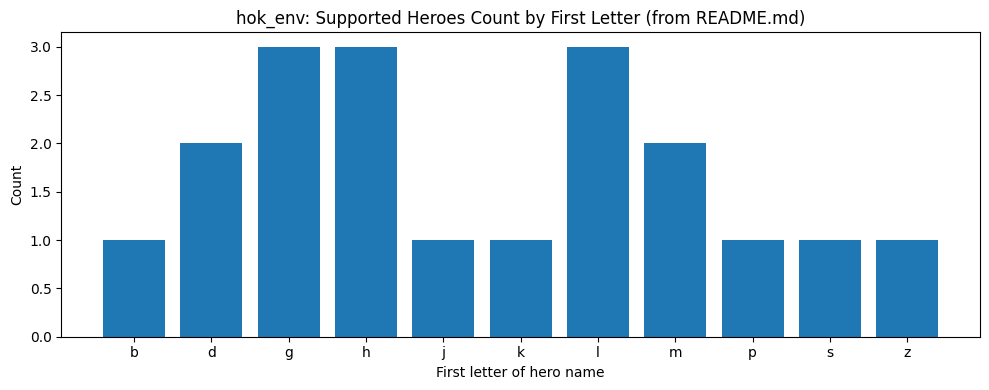

Saved plot to: hok_env_supported_heroes_plot.png


In [5]:
import matplotlib.pyplot as plt

heroes_df["first_letter"] = heroes_df["hero_name"].str[0].str.lower()
counts = heroes_df["first_letter"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.bar(counts.index, counts.values)
plt.title("hok_env: Supported Heroes Count by First Letter (from README.md)")
plt.xlabel("First letter of hero name")
plt.ylabel("Count")
plt.tight_layout()

out_path = "hok_env_supported_heroes_plot.png"
plt.savefig(out_path, dpi=200)
plt.show()

print("Saved plot to:", out_path)


## 3. Data + Plot from the Repo <a class="anchor" id="bullet3"></a>

The plot above is generated directly from the repository’s `README.md` section listing the **currently supported heroes**.  
This is a small example of how documentation inside a GitHub project can be treated as structured data for analysis.


In [6]:
# A small summary table
summary = pd.DataFrame({
    "Metric": [
        "Repo name",
        "GitHub URL",
        "Number of supported heroes (from README)",
        "Example plot file"
    ],
    "Value": [
        "tencent-ailab/hok_env",
        "https://github.com/tencent-ailab/hok_env",
        str(len(heroes_df)),
        "hok_env_supported_heroes_plot.png"
    ]
})
summary


,Metric,Value
0,Repo name,tencent-ailab/hok_env
1,GitHub URL,https://github.com/tencent-ailab/hok_env
2,Number of supported heroes (from README),19
3,Example plot file,hok_env_supported_heroes_plot.png


## 4. Quick Summary Table <a class="anchor" id="bullet4"></a>

The table above summarizes the project link and the small dataset extracted from the repo’s documentation.




## 5. Takeaways <a class="anchor" id="bullet5"></a>

- The repo is a solid starting point for studying **multi-agent reinforcement learning** in a MOBA environment.
- Even without running the full gamecore, the repo contains useful structure: SDK layout, training framework design, and algorithm scaffolding.
- The documentation itself can be mined to create quick analyses and plots (like the one in this report).

## Reflection on GitHub Commit History

When I looked at the commit history for my Jupyter Notebook on GitHub / GitHub Desktop, the code did **not** look very familiar at first. Unlike a normal Python script, the notebook appeared as a large block of structured text with metadata, cell outputs, and formatting information mixed in. This made it harder to visually recognize what I had actually written versus what was automatically generated by Jupyter.

In contrast, the Python script I created looked much more familiar. The commit history showed clear, readable lines of Python code in a logical order, similar to what I see in a code editor. Because `.py` files only contain code, it was easy to track changes and understand what was modified between commits.

The Jupyter Notebook code seemed foreign because notebooks are stored as **JSON files**, not plain Python scripts. This means that GitHub tracks not only the code itself, but also markdown text, cell structure, execution counts, and outputs. As a result, even small changes in the notebook can produce large-looking diffs that are difficult to interpret.

Overall, this experience helped me understand why Jupyter Notebooks are great for exploration and presentation, but why traditional Python scripts are often easier to manage and review using version control systems like GitHub.
